In [1]:
import numpy as np

import matplotlib.pyplot as plt

import shap

import xgboost as xgb

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification

In [2]:
# Generate sample data

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    random_state=42
    )

In [3]:
# Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Train an XGBoost model

model = xgb.XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
    )

In [5]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [6]:
# Create SHAP explainer

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

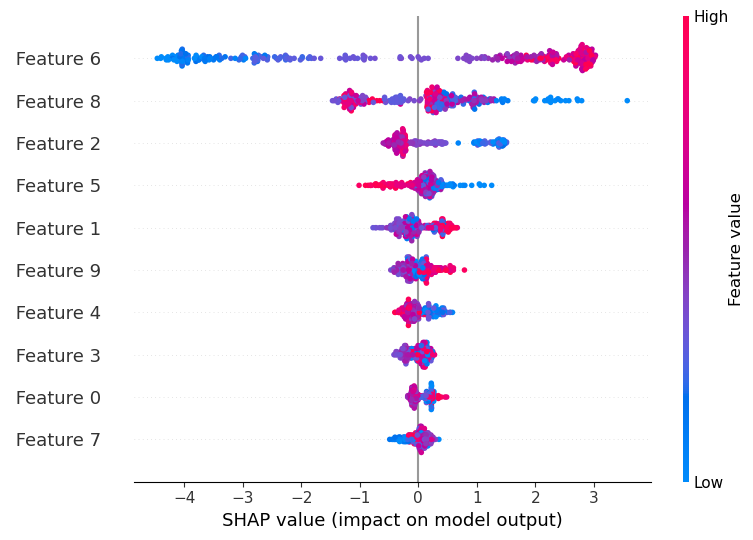

In [7]:
# Summary Plot - Shows overall feature importance and impact

plt.figure(figsize=(10,6))

shap.summary_plot(shap_values,X_test, feature_names = [f" Feature {i}" for i in range (X.shape[1])])

<Figure size 1000x600 with 0 Axes>

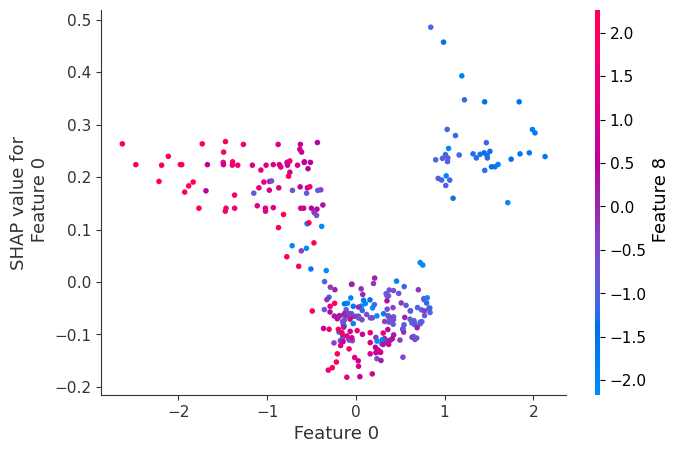

In [10]:
# Dependence Plot - Shows how one feature interacts with another

plt.figure(figsize=(10,6))

shap.dependence_plot(0,shap_values,X_test, feature_names = [f" Feature {i}" for i in range (X.shape[1])])
